In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r"/Users/ambaram/Desktop/dataset/kilowatt/train.csv")

In [4]:
y=data.iloc[:,-1]
y

0         6.766521
1         5.966275
2         2.874342
3        14.851089
4         3.519074
           ...    
28195     9.587934
28196     4.522195
28197    11.096599
28198     9.373239
28199     2.860342
Name: windmill_generated_power(kW/h), Length: 28200, dtype: float64

In [5]:
text_data=data.select_dtypes(include=["object"])
text_data

,tracking_id,datetime,turbine_status,cloud_level
0,WM_33725,2019-08-04 14:33:20,BA,Medium
1,WM_698,2018-11-05 10:13:20,A2,Medium
2,WM_39146,2019-09-14 14:03:20,ABC,Medium
3,WM_6757,2018-12-25 15:33:20,ABC,NaN
4,WM_21521,2019-05-04 03:13:20,AAA,Medium
...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,BB,Medium
28196,WM_32512,2019-07-26 12:53:20,BB,Low
28197,WM_5193,2018-12-12 02:13:20,D,Medium
28198,WM_12173,2019-02-03 19:13:20,BCB,Low


In [6]:
num_data=data.select_dtypes(include=['float64'])
num_data

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521
1,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275
2,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342
3,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089
4,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,2.774335,0.418299,24.590801,9.587934
28196,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,-3.250989,0.461531,26.051604,4.522195
28197,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,NaN,0.380264,28.533850,11.096599
28198,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,568.504898,1968.917692,47.562627,3.001855,0.346447,47.747269,9.373239


In [7]:
num_data=num_data.drop(columns=["windmill_generated_power(kW/h)"])

In [8]:
num_data_norm=num_data.copy()
for col in num_data.columns:
    num_data_norm[col]=(num_data[col]-num_data[col].min())/(num_data[col].max()-num_data[col].min())

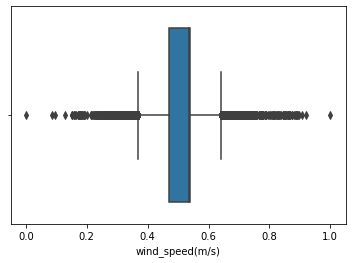

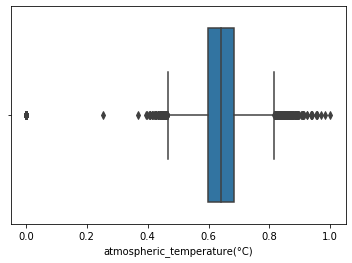

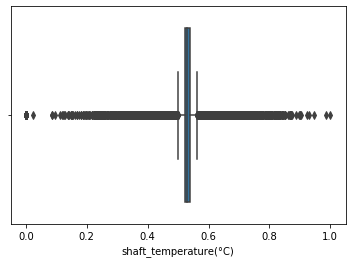

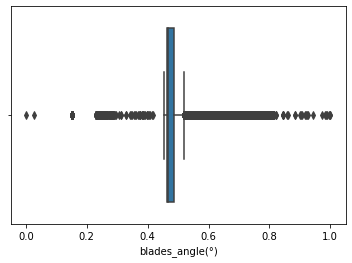

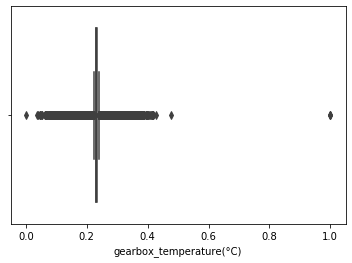

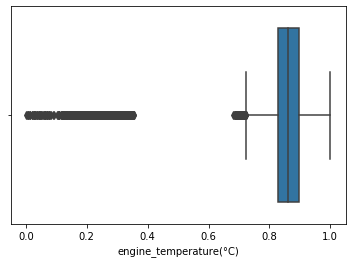

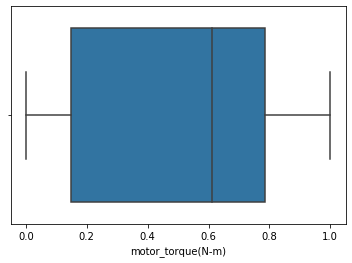

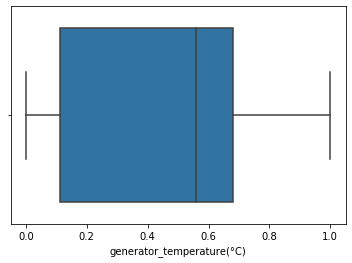

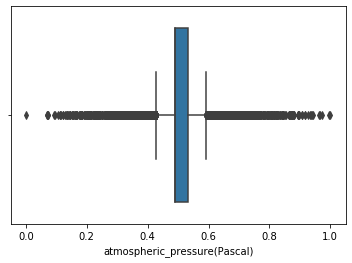

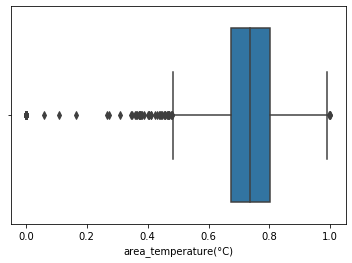

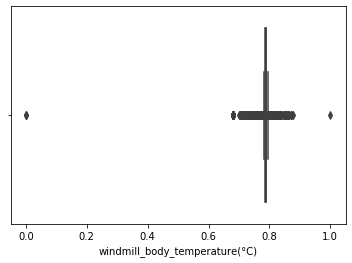

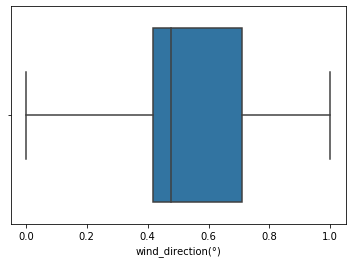

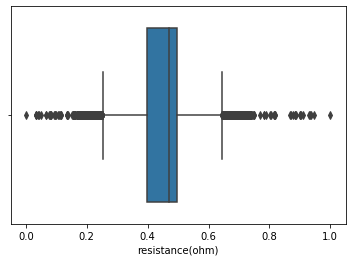

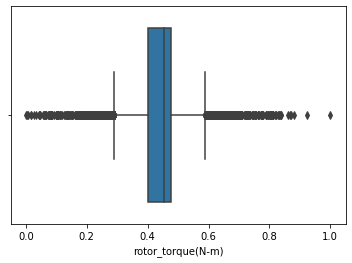

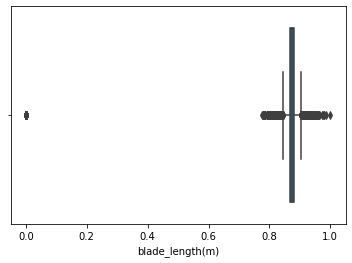

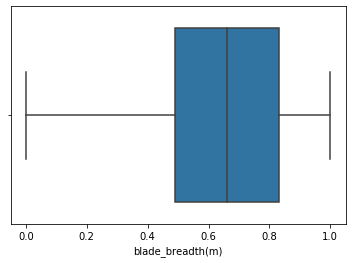

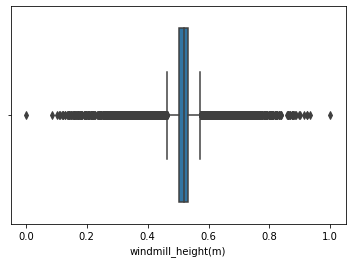

In [9]:
for col in num_data_norm:
    ax=sns.boxplot(x=num_data_norm.loc[:,col])
    plt.show()

In [10]:
num_data_iqr=num_data.copy()
for col in num_data_iqr.columns:
    num_data_iqr[col]=(num_data_iqr[col]-num_data_iqr[col].median())/(num_data_iqr[col].quantile(0.75)-num_data_iqr[col].quantile(0.25))

In [11]:
num_data_iqr.nunique()

wind_speed(m/s)                  27727
atmospheric_temperature(°C)      20809
shaft_temperature(°C)            27625
blades_angle(°)                  22830
gearbox_temperature(°C)          27911
engine_temperature(°C)           28188
motor_torque(N-m)                27660
generator_temperature(°C)        28187
atmospheric_pressure(Pascal)     25492
area_temperature(°C)             28170
windmill_body_temperature(°C)    21893
wind_direction(°)                22984
resistance(ohm)                  27365
rotor_torque(N-m)                25945
blade_length(m)                  22833
blade_breadth(m)                 28200
windmill_height(m)               27657
dtype: int64

In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
feat_sel_trans=VarianceThreshold()
x_feat_selected=feat_sel_trans.fit_transform(num_data_iqr)

In [14]:
print(x_feat_selected)

[[ 2.04060390e-02 -7.31348289e+00 -4.85852808e-01 ... -6.81626604e-01
  -8.29424642e-01 -5.53116071e-01]
 [ 1.99679359e+00  7.41014682e-01 -3.53144227e+01 ...  4.17546324e-01
   4.89683672e-01  4.30466927e-01]
 [ 2.93420464e-02             nan -4.53070753e-01 ... -4.04774817e-01
  -9.44662636e-01  4.64784332e-01]
 ...
 [ 1.15391460e-02  7.98804023e-01  3.26233979e-01 ...             nan
  -1.79833148e-01  8.50146298e-01]
 [ 2.86114229e-02  6.64480068e-01  1.07575760e+00 ... -2.49022412e-01
  -5.11665702e-01  7.19079762e+00]
 [-6.68737969e-01  1.66397028e-01 -8.53021133e+00 ...             nan
  -9.55389819e-02 -6.04690504e-01]]


In [15]:
num_data_iqr.isna().sum()

wind_speed(m/s)                   273
atmospheric_temperature(°C)      3450
shaft_temperature(°C)               2
blades_angle(°)                   216
gearbox_temperature(°C)             1
engine_temperature(°C)             12
motor_torque(N-m)                  24
generator_temperature(°C)          12
atmospheric_pressure(Pascal)     2707
area_temperature(°C)                0
windmill_body_temperature(°C)    2363
wind_direction(°)                5103
resistance(ohm)                     1
rotor_torque(N-m)                 572
blade_length(m)                  5093
blade_breadth(m)                    0
windmill_height(m)                543
dtype: int64

In [16]:
x_feat_selected.shape

(28200, 17)

In [17]:
num_feat_sel=pd.DataFrame(x_feat_selected,columns=num_data_iqr.columns)

In [18]:
num_feat_sel

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
0,0.020406,-7.313483,-0.485853,-0.060934,7.364284,-0.307177,0.333664,0.157257,0.841030,-0.522613,NaN,-0.190854,1.875619,0.327281,-0.681627,-0.829425,-0.553116
1,1.996794,0.741015,-35.314423,-14.718224,0.165966,0.837779,0.213871,0.196047,-0.011451,0.658955,NaN,0.401853,0.181788,2.691973,0.417546,0.489684,0.430467
2,0.029342,NaN,-0.453071,1.964589,-0.169058,-0.198213,-0.235315,-0.081464,-0.020383,0.321486,0.555185,-0.263266,-0.021729,-2.727808,-0.404775,-0.944663,0.464784
3,1.956284,-7.313483,0.435059,2.332537,0.289000,1.151376,0.537784,0.653303,0.004921,1.228383,0.504262,1.333048,0.510348,0.350996,0.774434,-0.308618,-0.551110
4,-1.110166,NaN,-0.421958,0.330406,-11.432585,-0.016992,-0.785152,-0.882353,0.950243,0.180184,-35.042342,-0.073421,-0.892680,-0.703971,NaN,0.537562,0.664614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0.019676,0.474914,0.424030,0.877500,-8.326061,1.533293,0.477157,0.534325,0.012215,1.174282,0.359708,1.599302,0.539513,0.464712,-0.374515,0.193391,-0.451105
28196,0.012027,0.503986,-0.400229,-14.718224,0.199835,-0.011449,0.110556,0.040138,-0.015739,-0.683334,0.205029,0.500298,0.061688,0.143660,-3.697908,0.617609,0.030976
28197,0.011539,0.798804,0.326234,1.501037,1.156817,0.158552,0.483473,0.638061,0.008811,1.146831,0.195167,1.587561,0.487575,1.988736,NaN,-0.179833,0.850146
28198,0.028611,0.664480,1.075758,0.529981,7.182628,0.397216,0.457717,0.514338,0.001675,1.190279,0.540410,1.794749,0.518219,0.524133,-0.249022,-0.511666,7.190798


In [19]:
from numpy import arange
thresholds=arange(0,0.55,0.05)

>Threshold=0.00, features=17
>Threshold=0.05, features=17
>Threshold=0.10, features=17
>Threshold=0.15, features=17
>Threshold=0.20, features=17
>Threshold=0.25, features=17
>Threshold=0.30, features=15
>Threshold=0.35, features=15
>Threshold=0.40, features=14
>Threshold=0.45, features=14
>Threshold=0.50, features=13


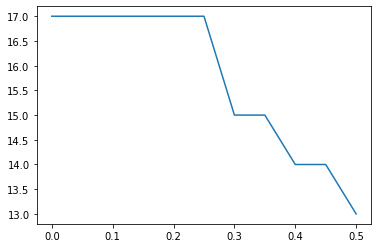

In [20]:
results=list()
for t in thresholds:
    transform=VarianceThreshold(threshold=t)
    x_feat_thresh=transform.fit_transform(num_data_iqr)
    n_features=x_feat_thresh.shape[1]
    print(">Threshold=%.2f, features=%d"%(t,n_features))
    results.append(n_features)
plt.plot(thresholds,results)
plt.show()

In [21]:
transform.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False,  True])

In [22]:
num_var_sel=num_data_iqr[num_data_iqr.columns[transform.get_support(indices=True)]]

In [23]:
num_var_sel

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),atmospheric_pressure(Pascal),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),windmill_height(m)
0,0.020406,-7.313483,-0.485853,-0.060934,7.364284,-0.307177,0.841030,NaN,-0.190854,1.875619,0.327281,-0.681627,-0.553116
1,1.996794,0.741015,-35.314423,-14.718224,0.165966,0.837779,-0.011451,NaN,0.401853,0.181788,2.691973,0.417546,0.430467
2,0.029342,NaN,-0.453071,1.964589,-0.169058,-0.198213,-0.020383,0.555185,-0.263266,-0.021729,-2.727808,-0.404775,0.464784
3,1.956284,-7.313483,0.435059,2.332537,0.289000,1.151376,0.004921,0.504262,1.333048,0.510348,0.350996,0.774434,-0.551110
4,-1.110166,NaN,-0.421958,0.330406,-11.432585,-0.016992,0.950243,-35.042342,-0.073421,-0.892680,-0.703971,NaN,0.664614
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0.019676,0.474914,0.424030,0.877500,-8.326061,1.533293,0.012215,0.359708,1.599302,0.539513,0.464712,-0.374515,-0.451105
28196,0.012027,0.503986,-0.400229,-14.718224,0.199835,-0.011449,-0.015739,0.205029,0.500298,0.061688,0.143660,-3.697908,0.030976
28197,0.011539,0.798804,0.326234,1.501037,1.156817,0.158552,0.008811,0.195167,1.587561,0.487575,1.988736,NaN,0.850146
28198,0.028611,0.664480,1.075758,0.529981,7.182628,0.397216,0.001675,0.540410,1.794749,0.518219,0.524133,-0.249022,7.190798


In [24]:
for col in num_var_sel:
    num_var_sel[col]=num_var_sel[col].fillna(num_var_sel[col].mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
print("Categories in Categorical data :")
for col in text_data:
    print("{}={}".format(col,len(text_data[col].unique()),text_data[col].unique()))

Categories in Categorical data :
tracking_id=28200
datetime=28200
turbine_status=15
cloud_level=4


In [26]:
imputed=text_data.iloc[:,2:]

In [27]:
imputed

,turbine_status,cloud_level
0,BA,Medium
1,A2,Medium
2,ABC,Medium
3,ABC,NaN
4,AAA,Medium
...,...,...
28195,BB,Medium
28196,BB,Low
28197,D,Medium
28198,BCB,Low


In [28]:
imputed["missing_turbine_status"]=np.where(imputed["turbine_status"].isna(),1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
imputed["turbine_status"].fillna(imputed["turbine_status"].mode()[0],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
imputed

,turbine_status,cloud_level,missing_turbine_status
0,BA,Medium,0
1,A2,Medium,0
2,ABC,Medium,0
3,ABC,NaN,0
4,AAA,Medium,0
...,...,...,...
28195,BB,Medium,0
28196,BB,Low,0
28197,D,Medium,0
28198,BCB,Low,0


In [31]:
imputed["missing_turbine_status"].value_counts()

0    26441
1     1759
Name: missing_turbine_status, dtype: int64

In [32]:
imputed["missing_cloud_level"]=np.where(imputed["cloud_level"].isna(),1,0)
imputed["cloud_level"].fillna(imputed["cloud_level"].mode()[0],inplace=True)

In [33]:
final_text=imputed.iloc[:,2:]

In [34]:
frames=[num_var_sel,final_text]

In [35]:
df_final=num_var_sel.copy()

In [36]:
final_text

,missing_turbine_status,missing_cloud_level
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
28195,0,0
28196,0,0
28197,0,0
28198,0,0


In [37]:
for col in final_text:
    df_final[col]=final_text[col]

In [38]:
df_final

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),atmospheric_pressure(Pascal),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),windmill_height(m),missing_turbine_status,missing_cloud_level
0,0.020406,-7.313483,-0.485853,-0.060934,7.364284,-0.307177,0.841030,-5.434062,-0.190854,1.875619,0.327281,-0.681627,-0.553116,0,0
1,1.996794,0.741015,-35.314423,-14.718224,0.165966,0.837779,-0.011451,-5.434062,0.401853,0.181788,2.691973,0.417546,0.430467,0,0
2,0.029342,-0.998748,-0.453071,1.964589,-0.169058,-0.198213,-0.020383,0.555185,-0.263266,-0.021729,-2.727808,-0.404775,0.464784,0,0
3,1.956284,-7.313483,0.435059,2.332537,0.289000,1.151376,0.004921,0.504262,1.333048,0.510348,0.350996,0.774434,-0.551110,0,1
4,-1.110166,-0.998748,-0.421958,0.330406,-11.432585,-0.016992,0.950243,-35.042342,-0.073421,-0.892680,-0.703971,-0.661498,0.664614,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,0.019676,0.474914,0.424030,0.877500,-8.326061,1.533293,0.012215,0.359708,1.599302,0.539513,0.464712,-0.374515,-0.451105,0,0
28196,0.012027,0.503986,-0.400229,-14.718224,0.199835,-0.011449,-0.015739,0.205029,0.500298,0.061688,0.143660,-3.697908,0.030976,0,0
28197,0.011539,0.798804,0.326234,1.501037,1.156817,0.158552,0.008811,0.195167,1.587561,0.487575,1.988736,-0.661498,0.850146,0,0
28198,0.028611,0.664480,1.075758,0.529981,7.182628,0.397216,0.001675,0.540410,1.794749,0.518219,0.524133,-0.249022,7.190798,0,0


In [39]:
df_target=pd.DataFrame(y,columns=["windmill_generated_power(kW/h)"])

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
fit=LinearRegression()

In [70]:
fit.fit(df_final,df_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
r2_score=reg.score(df_final,df_target)
print(r2_score*100,'%')

20.96575186230205 %


In [43]:
df_target.isna().sum()

windmill_generated_power(kW/h)    207
dtype: int64

In [46]:
df_target

,windmill_generated_power(kW/h)
0,6.766521
1,5.966275
2,2.874342
3,14.851089
4,3.519074
...,...
28195,9.587934
28196,4.522195
28197,11.096599
28198,9.373239


In [47]:
df_target=(df_target-df_target.min())/(df_target.max()-df_target.min())

In [65]:
df_target=df_target.fillna(df_target.mean())

In [66]:
df_target.isna().sum()

windmill_generated_power(kW/h)    0
dtype: int64